# Grundlagen des Factor Investings


## Factor Investing als Ranking oder Long-Short Strategie
Eine Long-Short Strategie besteht darin, sowohl Long- als auch Short-Positionen aufzubauen. Bei dieser Strategie werden alle Aktien eines vorher festgelegten Universums (z.B. S&P500) anhand eines Bewertungsmaßstabs (ein Faktor) in eine Rangfolge gebracht, und die oberen $n$-Aktien der Rangfolge gekauft (Long-Position) und die unteren $n$-Aktien verkauft (Short-Position). Hierbei gilt: Gesamtwert der Long-Position = Gesamtwert der Short-Position.

Dies ist ein statistisch robuster Ansatz - durch die Rangordnung vieler Aktien und das simultane Eingehen mehrerer Positionen schließen wir faktisch zahlreiche "Wetten" auf die Prognosegüte unseres Ranking-Modells (des Faktors) ab und vermeiden so eine Abhängigkeit von wenigen riskante Wetten beim diskretionären "Stock-Picking". Da zudem die gleiche Geldmenge in Long- und Short-Positionen investiert wird, ist die Strategie marktneutral (immun gegen Marktbewegungen).

**Ranking-Schema**

Ein Ranking-Schema ist jedes Modell, das beliebige Aktien in eine eindeutige Rangordnung bringen kann. Beispiele hierfür können Bewertungsrelationen (sog. Multiples), technische Indikatoren, Preismodelle oder eine Kombination aller genannten Faktoren sein. Man kann z.B. einen Momentum-Indikator verwenden, um Aktien zu reihen, oder zwei Indikatoren:  Ranking-Score = (0,5 x das PE-Verhältnis der Aktie) + (0,5 x das 30-Tage-Kurs-Momentum).

Der Erfolg dieser Strategie basiert auf der Prognosegüte des verwendeten Ranking-Schemas - die Renditen einer Long-Short Aktienstrategie hängen davon ab, wie gut das Ranking Aktien mit hohen und niedrigen zukünftigen Renditen separiert. Die Entwicklung eines profitablen Rankingschemas ist offenichtlich nicht trivial wenn Aktienmärkte effizient sind.

**Auf das Ranking Schema "wetten"**

Sobald ein Modell für die Aktien-Rangordnung festgelegt wurde, kann dies verwendet werden um Handelssignale zu generieren. Ein einfacher Ansatz besteht darin, einen gleichen Geldbetrag long in die Top-Positionen der Rangliste und short in die Bottom-Positionen zu investieren. Auf diese Weise wird sichergestellt, dass sich die Strategie proportional zur Qualität der Rangordnung rentiert und zudem marktneutral ist.

Nehmen wir an, wir ordnen $m$ Aktien, haben $d$ Dollar zu investieren, und unsere Zielvorgabe für die Gesamtzahl der zu haltenden Positionen ist $2n$. Es resultiert die folgende Strategie:

* Für jede Aktie mit Rang $1, \dots, n$, verkaufe $\frac{1}{2n} * d$-Dollar dieser Aktie
* Für jede Aktie mit Rang $m - n, \dots, m$, kaufe $\frac{1}{2n} * d$ Dollar dieser Aktie. 

**Anmerkung: Friktion aufgrund nicht beliebiger Teilbarkeit**

Weil Aktienkurse nicht immer durch $\frac{1}{2n} * d$ gleichmäßig teilbar sind, und Aktien stückweise gekauft werden müssen, ist die obige Strategie etwas ungenau. In der Praxis ist es meistens in Ordnung, etwas mehr als $\frac{1}{2n}  * d$ Dollar pro Aktie zu kaufen. Dies kann jedoch bei niedrigen Kapitalbeträgen zu Problemen führen. Bei einer Strategie mit $d = 100000$ und $n = 500$ sehen wir, dass 
$$\frac{1}{2n} * d = \frac{1}{1000} * 100000 = 100$$


Dies wird bei teuren Aktien Probleme bereiten und dazu führen, dass der Algorithmus einen zu großen Hebel besitzt. Ein möglicher Ausweg besteht darin, weniger Aktien zu handeln oder das Kapital, $d$, zu erhöhen.

## Ein hypothetisches Beispiel
Wir generieren zufällige Aktien-Namen und einen Zufallsfaktor, nach dem wir sie anordnen. Wir gehen auch davon aus, dass zukünftige Renditen von diesen Faktorwerten abhängig sind.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# generate stocks and a random factor value for them
stock_names = ['stock ' + str(x) for x in range(10000)]
current_factor_values = np.random.normal(0, 1, 10000)
# generate future returns for these that are dependent on our factor values
future_returns = current_factor_values + np.random.normal(0, 1, 10000)
# put both the factor values and returns into one dataframe
data = pd.DataFrame(index = stock_names, columns=['Factor Value','Returns'])
data['Factor Value'] = current_factor_values
data['Returns'] = future_returns
# take a look
data.head(10)

,Factor Value,Returns
stock 0,-0.684866,-0.364867
stock 1,0.020327,-2.022530
stock 2,-1.165042,-1.379441
stock 3,0.688505,1.527440
stock 4,1.002517,-0.000369
stock 5,1.308407,1.191608
stock 6,-0.700452,-1.397595
stock 7,-1.287748,-1.961418
stock 8,0.071281,-0.820682
stock 9,0.496674,0.775194


Jetzt, da wir über Faktorwerte und Renditen verfügen, können wir sehen, was passieren würde, wenn wir unsere Aktien nach Faktorwerten ordnen und dann die Long- und Short-Positionen eingehen würden.

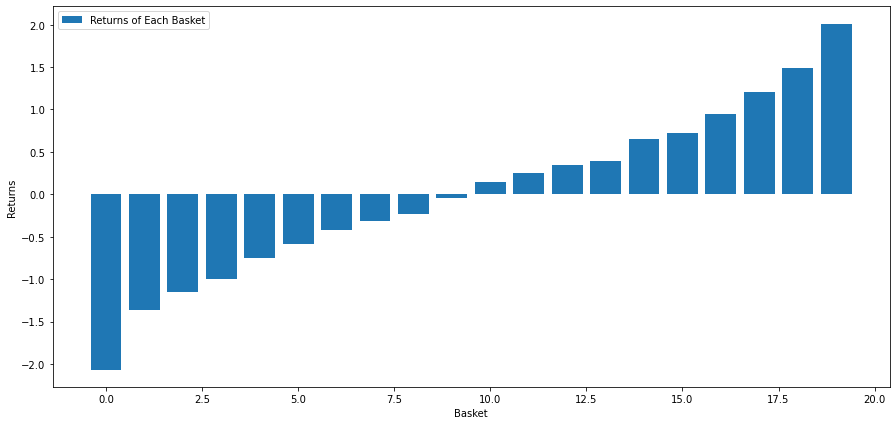

In [4]:
# rank the equities
ranked_data = data.sort_values('Factor Value')

# compute the returns of each basket with a basket size 500, so total (10000/500) baskets
number_of_baskets = int(10000/500)
basket_returns = np.zeros(number_of_baskets)

for i in range(number_of_baskets):
    start = i * 500
    end = i * 500 + 500 
    basket_returns[i] = ranked_data[start:end]['Returns'].mean()

# plot the returns of each basket
plt.figure(figsize=(15,7))
plt.bar(range(number_of_baskets), basket_returns)
plt.ylabel('Returns')
plt.xlabel('Basket')
plt.legend(['Returns of Each Basket'])
plt.show()

Unsere Strategie besteht darin, in den obersten Korb (Basket) long zu gehen und den untersten Korb short zu halten. Die Erträge dieser Strategie sind:

In [5]:
basket_returns[number_of_baskets-1] - basket_returns[0]

4.077706574978949

Wir setzen grundsätzlich darauf, dass unser Ranking-Modell in der Lage ist, Aktien mit guter zukünftiger Performance von Aktien mit schlechter Performance zu trennen. **Das Gute daran, Geld auf der Grundlage des Rankings zu verdienen ist, dass es vom Marktgeschehen nicht beeinflusst wird.**

## Das richtige Ranking-Schema finden

Um eine Faktorstrategie auszuführen, müssen wir effektiv nur das Ranking-Schema festlegen. Alles was danach kommt ist rein mechanisch. Sobald wir eine Faktor- bzw. Long-Short Strategie implementiert haben, können wir verschiedene Ranking-Schemata auswählen und alles andere gleich lassen. Das ist eine sehr bequeme Methode, um Ideen, die wir haben, schnell zu wiederholen, ohne sich jedes Mal Gedanken über die Anpassung des Codes machen zu müssen.

Die Ranking-Schemata können ebenfalls von zahlreichen Modelltypen stammen. Es muss kein Fundamentalwert- oder risikobasiertes Faktormodell sein, es können auch Methoden der Künstlichen Intelligenz (Maschinelles Lernen) verwendet werden, die die Renditen einen Monat im Voraus vorhersagen und auf dieser Grundlage eine Rangliste erstellen.

## Auswahl und Bewertung eines Ranking-Schemas

Das Ranking-Schema ist die Stelle, an der eine Faktorstrategie ihren potentiellen Vorteil generiert, zugleich ist es die wichtigste Komponente. Ein erster Startpunkt für die Suche nach einem profitablen Maß ist es, bestehende bekannte Techniken auszuwählen und zu prüfen, ob sie leicht modifiziert werden können, mit dem Ziel, höhere Renditen zu erzielen. Wir werden hier einige Ansatzpunkte diskutieren.

* **Klonen und Optimieren:**
Wählen Sie ein Rankingmaß aus das häufig diskutiert wird und versuchen Sie, es leicht zu modifizieren, um einen potentiellen Renditevorsprung zu gewinnen. Oftmals besitzen altbekannte Faktoren, die öffentlich zugänglich sind, keinerlei Prognosekraft mehr, da sie vom Markt schon vollständig eingepreist wurden. Manchmal zeigen sie jedoch in die richtige Richtung.

* **Risikobasierte Faktoren (Preis- bzw. Faktormodelle):**
Jedes Modell, das zukünftige Renditen ("Expected Returns") vorhersagt, kann ein Faktor/Rankingmaß sein. Die prognostizierte zukünftige Rendite (bzw. die Ausprägungen der zugrunde liegenden Risikofaktoren) ist jetzt dieser Faktor und kann zum Ranking der Aktiengrundgesamtheit verwendet werden. Sie können prinzipiell jedes noch so komplizierte Preismodell in ein Ranking umwandeln.

* **Preisbasierte Faktoren (Technische Indikatoren):**
Preisbasierte Faktoren nehmen Informationen über den historischen Preis jeder Aktie und verwenden sie, um den Faktorwert zu generieren. Beispiele dafür könnten 30-Tage-Momentum oder einfache Volatilitätsmaße sein.

    *Reversion vs. Momentum:*
    Momentum Faktoren wetten darauf, dass Preise, wenn sie sich einmal in eine Richtung bewegen, dies auch weiterhin tun werden. Reversal Faktoren wetten auf das Gegenteil. Beides sind zulässige Modelle für unterschiedliche Zeithorizonte und Assetklassen, und es ist wichtig zu untersuchen, ob das zugrunde liegende Aktienkursverhalten auf Momentum oder Reversion beruht.

* **Fundamentale Faktoren:**
Fundamentalwerte enthalten Informationen (z.B. aus Bilanzen), die mit Fakten über ein Unternehmen verknüpft sind, so dass sie in vielerlei Hinsicht robuster sein können als vergangene Preise.

* **The Factor "Arms Race":**
Letztlich ist die Entwicklung von Ranking-Faktoren mit Prognosegüte wie ein "Wettrüsten", bei dem man versucht, gegenüber seinen Wettbewerbern immer einen Schritt voraus zu sein. Neue Faktoren haben nur eine begrenzte Lebensdauer, sie werden mit der Zeit zunehmend in Märkten eingepreist und verlieren somit ihre Pognosequalität. Daher ist es wichtig, ständig festzustellen, wie stark die Prognosegüte verwendeter Faktoren abnimmt und zu prüfen, welche neuen Faktoren an ihre Stelle treten könnten.

## Zusätzliche Überlegungen

### Rebalancing-Frequenz

Jedes Rankingsystem wird Renditen über einen etwas anderen Zeitraum vorhersagen können. Ein preisbasiertes Mean Reversion Maß kann Renditen über einige Tage vorhersagen, während ein fundamentalwertbasiertes Faktormodell eher auf die Prognose längerfristiger Renditen ausgerichtet ist. Es ist wichtig den Zeitrahmen zu bestimmen, über den ein ausgewähltes Modell prädiktiv sein soll, und dies statistisch zu überprüfen bevor die Strategie ausgeführt wird. Bei der Bestimmung der optimalen Portfoliohaltedauer (Rebalancing Frequenz) gilt es natürlich auch wieder, overfitting zu vermeiden! Der optimale Horizont für die Renditeprognose (und damit Haltperiode) auf Basis von In-Sample Daten muss nicht optimal für Out-of-Sample Daten sein!

Sobald Sie den Zeitrahmen festgelegt haben für den Ihr Ranking-Schema prädiktiv ist, versuchen Sie, in etwa in dieser Frequenz das Portfolio umzuschichten, um damit die Prognosegüte des Modells voll ausnutzen zu können und Transaktionskosten zu sparen.

### Kapitalkapazität und Transaktionskosten

Jede Strategie besitzt ein Minimum und ein Maximum an investiertem Kapital, um profitabel zu sein. Insbesondere wenn zu viel Kapital in eine Strategie fließt, wird die der Strategie zugrunde liegende Marktineffizienz schnell eliminiert und die Strategie damit unprofitabel.  

Der Handel mit vielen Aktien verursacht hohe Transaktionskosten. Angenommen die Portfoliostrategie umfasst $1000$ Aktien, dann entstehen pro Portfolioumschichtung Kosten in Höhe von Tausenden von Dollar/Euro. Die eingesetzte Kapitalbasis muss daher so hoch sein, dass die Transaktionskosten nur einen kleinen Prozentsatz der mit der Strategie erwirtschafteten Rendite ausmachen. Angenommen Sie setzen $100.000$ Dollar ein und verdienen $1\%$ pro Monat, dann würden bereits $1000$ Dollar an Transaktionskosten pro Monat Ihre gesamte Rendite eliminieren. Sie müssten die Strategie mit Millionen von Dollar betreiben, wenn sie mit $1000$ Aktien profitabel sein soll.

Die Mindestkapazität einer Portfoliostrategie ist daher generell eher hoch und hängt weitgehend von der Anzahl der gehandelten Aktien ab. Die maximale Kapazität ist meistens auch recht hoch, da Hunderte von Millionen Dollar in Long-Short Aktienstrategien investiert werden können ohne dass die Strategie ihre Prognosegüte verliert. Dies liegt daran, dass die Strategie relativ selten eine Portfolioumschichtung erfordert und das gesamte Dollarvolumen durch die Anzahl der gehandelten Aktien geteilt wird. Wenn Sie also Ihr gesamtes Portfolio von 100.000.000 Dollar investiert in 1000 Aktien jeden Monat "rebalancen", dann halten und handeln sie im Durchschnitt nur 100.000 Dollar pro Monat in jeder Aktie, was in der Regel nicht ausreicht, um für die meisten Aktien einen signifikanten Marktanteil zu erreichen.